<a href="https://www.kaggle.com/code/sjagkoo7/titanic-survival-prediction?scriptVersionId=175638349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Prediction
Given a custom dataset which represents the details of passengers who were in the great 'Titanic' ship.

Our task is to find whether a person survived or not after the incident using various models provided by `scikit-learn`.

Your aim is to get the predictions using different models by tuning the parameters of your choice.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import sklearn # machine learninng modelling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


# Reading the Dataset

In [2]:
titanic=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')

In [3]:
# first three rows of train dataset
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Exploring the Dataset

In [4]:
# Summary of dataset
def summary(titanic):
    df=pd.DataFrame(index=titanic.columns)
    df['dtypes']=titanic.dtypes
    df['count']=titanic.count()
    df['#unique']=titanic.nunique()
    df['missing']=titanic.isna().sum()
    df['missing%'] = titanic.isna().sum()/len(titanic)*100
    df = pd.concat([df,(titanic.describe().T.drop('count',axis=1))],axis=1)
    return df

In [5]:
summary(titanic).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,missing,missing%,mean,std,min,25%,50%,75%,max
PassengerId,int64,891,891,0,0.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,int64,891,2,0,0.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,int64,891,3,0,0.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Name,object,891,891,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Sex,object,891,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Age,float64,714,88,177,19.865320,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,int64,891,7,0,0.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,int64,891,7,0,0.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,object,891,681,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Fare,float64,891,248,0,0.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana"> 
    
<b>Insight:</b>
* We have numerical and  categorical columns
* Missing Values: The dataset contains NA values, null values handling  will be required .
* Outcome: Target variable is  "Survived" variable. Possibilities include: lived(1), died(0).

In [6]:
#  dataset - displaying rows if any have duplicate rows
titanic_duplicated_rows=titanic[titanic.duplicated()]
titanic_duplicated_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color:  #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
* There is no duplicated rows in dataset

In [7]:
#titanic dataset - displaying rows if any have null rows
titanic[titanic.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals.
null_vals=titanic.isna().sum().values.tolist()
null_vals

[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

In [9]:
# Handle the  null values of Age , Embarked and Cabin column
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic[['Cabin','Embarked']]= titanic[['Cabin','Embarked']].ffill()

In [10]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals_after.
null_vals_after=titanic.isna().sum().values.tolist()
null_vals_after

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [11]:
# Dataset Attributes Description
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #20BEFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#d79190'>💡 Dataset Attributes Description:</font></h3>

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Description</th>
            <th>Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>PassengerId</td>
            <td>ID Number of  Passenger</td>
            <td>Numeric ID</td>
        </tr>
        <tr>
            <td>Survived</td>
            <td>Passenger Died or Lived</td>
            <td>1 = Lived, 0 = Died</td>
        </tr>
        <tr>
            <td>Pclass</td>
            <td>Passenger Onboarded Class</td>
            <td>1 = First Class , 2 = Second Class , 3 = Third Class</td>
        </tr>
        <tr>
            <td>Name</td>
            <td>Name of the Passenger</td>
            <td>Passenger Name</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>Gender of the Passenger</td>
            <td>0 = Male , 1 = Female</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Age of the Passenger</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>SibSp</td>
            <td>Number of siblings or spouses traveling</td>
            <td>SibSp Numbers</td>
        </tr>
        <tr>
            <td>Parch</td>
            <td>Number of parents or children traveling</td>
            <td>Parch Numbers</td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>Ticket ID of the Passenger</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Fare</td>
            <td>Cost of the Ticket</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>Cabin</td>
            <td>Cabin ID</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Embarked</td>
            <td>the port where the passenger embarked the ship (e.g., Southampton, Cherbourg, Queenstown)</td>
            <td>Southampton(S), Cherbourg(C), Queenstown(Q)</td>
        </tr>
    </tbody>
</table>

</div>

# Visualization

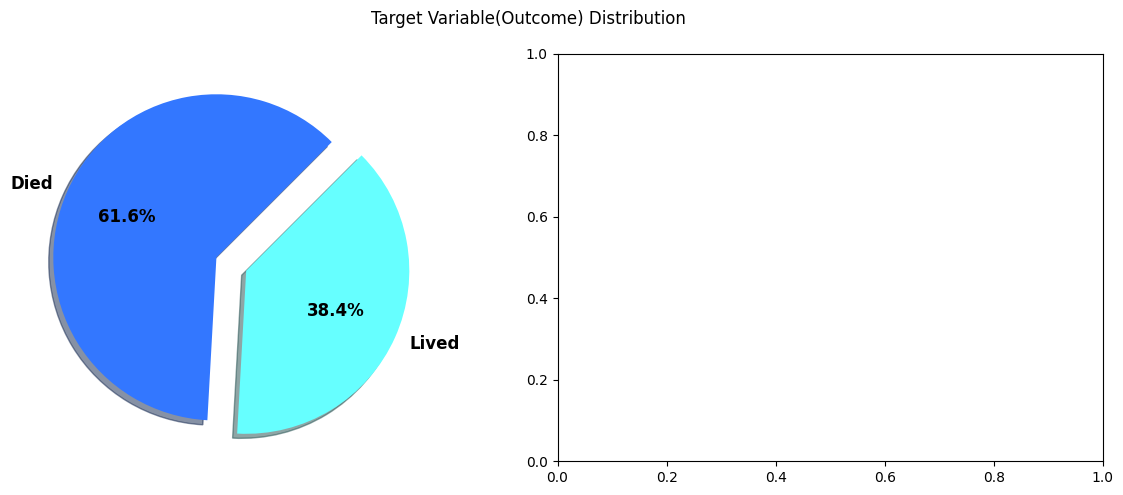

In [12]:
# Target variable distribution
fig,ax=plt.subplots(1,2,figsize=(12,5))

# ax[0] means first columns -- ax[0][0]
# ax[1] means second columns -- ax[0][1]

ax[0].pie(titanic.Survived.value_counts(),
          explode=[0.0,0.2],startangle= 45,
          shadow=True,colors=['#3377ff', '#66ffff'],
          autopct='%.1f%%',labels=['Died','Lived'],
          textprops={'fontsize': 12, 'weight': 'bold'}
         )

# explode -- to make slice in pie graph and array value represent the distance between one slice to another
# startangle -- to rotate slice
# shadow -- to create shadow of graph i.e. back image


fig.suptitle('Target Variable(Outcome) Distribution')
plt.tight_layout()
plt.show()

In [13]:
#help(plt.pie)